# Preprocessing

In [1]:
#read from csv
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import plot_tree
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import *
from sklearn.metrics import roc_auc_score

df = pd.read_csv('diabetes.csv')
df = df.iloc[: , 1:]
# pd.set_option('display.max_rows', df.shape[0]+1)

<div dir=rtl>
  <font color="yellow">
    در این قسمت مقادیر نام ستون هایی که بین آنها فاصله است تغییر میکند به حالتی که اسپس بین کلمات حذف شده است و کلمات پشت سر هم بدون فاصله قرار میگیرند.
  </font>
</div>

In [2]:
#rename column names
columns_names_dict = {}
columns = df.columns.values.tolist()
for col in columns:
  if " " in col:
    columns_names_dict[col] = col.replace(" ", "")

df.rename(columns = columns_names_dict, inplace = True)
columns = df.columns.values.tolist()

<div dir=rtl>
  <font color="yellow">
    در این قسمت مقادیر Null را با مقادیر مناسب جایگذاری میکنیم. یکی از راه ها این است که به جای مقادیر Null از میانگین، میانه، واریانس، مد و یا یکی از داده های ستون به صورت تصادفی و یا مقداری ثابت استفاده کنیم که در این جا مقادیر Null را با مد پر کرده ایم.
    <br/>
    همچنین در ستون Income یکی از سطر ها مقدار Unkown دارد که آن را با NaN جایگذاری میکنیم تا بعد بتوانیم مقدار آن را با مد پر کنیم.
  </font>
</div>

In [3]:
#handle null values
for col in columns:
  if df.isna()[col].sum() > 0:
    df[col].fillna(df[col].mode()[0], inplace=True)

for col in columns:
  if df.isna()[col].sum() > 0:
    print("True")

df.Income.replace(['Unknown'], [np.NaN], inplace=True)

<div dir=rtl>
  <font color="yellow">
    در این قسمت کار نرمالایز کردن ستون هارا انجام میدهیم. چهار ستون BMI, MetalHealth, PhysicalHealth و Age را نرمالایز میکنیم.
    <br/>
    برای ستون BMI بدین صورت عمل میکنیم که ابتدا این ستون را به یک فیچر categorical تبدیل میکنیم. سپس در ادامه از روش OneHotEncoding استفاده میکنیم.
    <br>
    برای ستون های Age, MentalHealth, PhysicalHealth که به اندازه ‌BMI توزیع مقادیر متفاوتی ندارند و همچنین بازه ی مقادیر آنها کمتر است از روش Min-Max برای نرمالایز کردن ستون استفاده میکنیم.
  </font>
</div>

In [4]:
#normalize data

# field = 'BMI'
# print(df[field].min(), df[field].max())

BMI_Category = pd.cut(df.BMI.astype(float).astype(int), bins=[11, 19, 40, 53, 98], labels=["Cat1", "Cat2", "Cat3", "Cat4"])
df = df.drop('BMI', 1)
df.insert(4, 'BMI', BMI_Category)

df["MentalHealth"] = (df["MentalHealth"] - df["MentalHealth"].min()) / (df["MentalHealth"].max() - df["MentalHealth"].min())
df["PhysicalHealth"] = (df["PhysicalHealth"] - df["PhysicalHealth"].min()) / (df["PhysicalHealth"].max() - df["PhysicalHealth"].min())
df["Age"] = (df["Age"] - df["Age"].min()) / (df["Age"].max() - df["Age"].min())

# df.iloc[:100, :]

# df['BMI'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


<div dir=rtl>
  <font color="yellow">
    در این قسمت فیچر هایی که categorical هستند را به ویژگی های عددی با استفاده از روش OneHotEncoding تبدیل میکنیم. ۵ تا از ویژگی ها categorical هستند که این ستون ها عبارتند از: GeneralHealth, Sex, Education, Income و BMI که در قسمت قبلی آن را تبدیل به یک ویژگی دسته بندی شده تبدیل کردیم.
  </font>
</div>

In [5]:
#OneHotEncoding

encoder_df = pd.get_dummies(df.BMI, prefix='BMI')
df = df.join(encoder_df)
df.drop('BMI', axis=1, inplace=True)

encoder_df = pd.get_dummies(df.GeneralHealth, prefix='GeneralHealth')
df = df.join(encoder_df)
df.drop('GeneralHealth', axis=1, inplace=True)

encoder_df = pd.get_dummies(df.Sex, prefix='Sex')
df = df.join(encoder_df)
df.drop('Sex', axis=1, inplace=True)

encoder_df = pd.get_dummies(df.Education, prefix='Education')
df = df.join(encoder_df)
df.drop('Education', axis=1, inplace=True)

encoder_df = pd.get_dummies(df.Income, prefix='Income')
df = df.join(encoder_df)
df.drop('Income', axis=1, inplace=True)

df.iloc[:100, :]

,Diabetes_binary,HighBP,HighCholesterol,CholesterolCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysicalActivity,Fruits,Veggies,...,Education_Cat5,Education_Cat6,Income_Cat1,Income_Cat2,Income_Cat3,Income_Cat4,Income_Cat5,Income_Cat6,Income_Cat7,Income_Cat8
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,1
1,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,1
3,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,1
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0,1,0,0,0,1,0,0,0,0
96,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
97,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,1
98,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1,0,0,0,0,0,0,1,0,0


<div dir=rtl>
  <font color="yellow">
    در نهایت در آخرین قسمت Preprocessing ستون جواب نهایی و لیبل را از دیتاست جدا میکنیم که همان ستون Diabetes_binary است.
  </font>
</div>

In [6]:
#Spli label

label = df[["Diabetes_binary"]]
df = df.drop('Diabetes_binary', 1)

df.iloc[:100, :]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


,HighBP,HighCholesterol,CholesterolCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysicalActivity,Fruits,Veggies,HeavyAlcoholConsumption,...,Education_Cat5,Education_Cat6,Income_Cat1,Income_Cat2,Income_Cat3,Income_Cat4,Income_Cat5,Income_Cat6,Income_Cat7,Income_Cat8
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
3,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0,1,0,0,0,1,0,0,0,0
96,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
97,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
98,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1,0,0,0,0,0,0,1,0,0


# Build Model

<div dir=rtl>
  <font color="yellow">
    در این قسمت باید داده های آموزشی و داده های تست را از هم جدا کنیم و از دیتاست اصلی درصدی را برای تست کردن مدل درنظر بگیریم. که از متد train_test_split برای این منظور استفاده میکنیم.
  </font>
</div>

In [7]:
#split train and test data
df = df.iloc[:, :].values
label = label.iloc[:, :].values
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.3, random_state=1)
y_train = y_train.ravel()
y_test = y_test.ravel()
print(df.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(70692, 41) (49484, 41) (21208, 41) (49484,) (21208,)


<div dir=rtl>
  <font color="yellow">
    در این قسمت مدل Classifier‌ خود را که همان XGBClassifier است میسازیم. سپس آرگومان های ورودی آن را با مقادیر مناسب پر میکنیم.
  </font>
</div>

In [13]:
#build model
model = XGBClassifier(learning_rate=0.1, max_depth=4, n_estimators=200, 
                      subsample=0.5, colsample_bytree=1, random_seed=123, random_state=123, eval_metric='auc', verbosity=1, early_stopping_rounds=10)
print(model.get_params())

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 4, 'min_child_weight': 1, 'missing': None, 'n_estimators': 200, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 123, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 0.5, 'verbosity': 1, 'random_seed': 123, 'eval_metric': 'auc', 'early_stopping_rounds': 10}


<div dir=rtl>
  <font color="yellow">
    در این قسمت داده های تست را طبق مدل بدست آمده پیش بینی میکنیم و دقت مدل را چاپ میکنیم که دقت آن 74.6 درصد است.
  </font>
</div>

In [17]:
#predict test data
# print(X_train.dtypes)

model.fit(X_train, y_train)
print(model)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

XGBClassifier(early_stopping_rounds=10, eval_metric='auc', max_depth=4,
              n_estimators=200, random_seed=123, random_state=123,
              subsample=0.5)


0.7463692946058091

<div dir=rtl>
  <font color="yellow">
    در این قسمت ماتریس درهم ریختگی را چاپ و آن را رسم میکنیم.
  </font>
</div>

[[7479 3202]
 [2177 8350]]


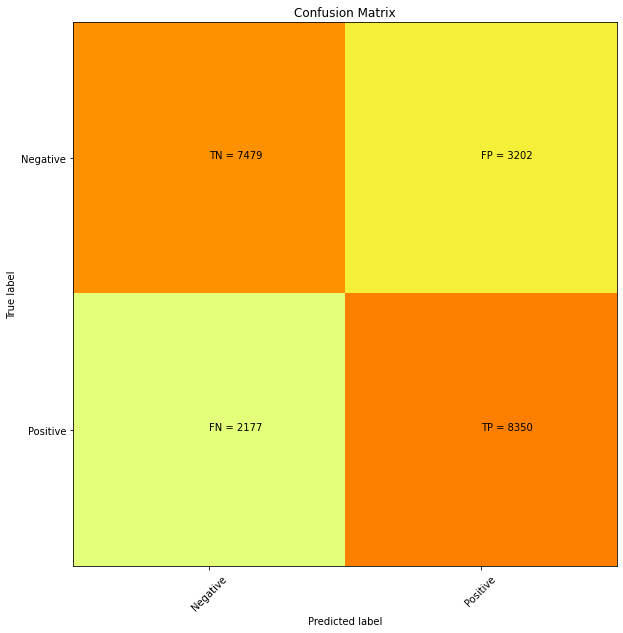

In [18]:
def plot_confusion_matrix(y_test, y_pred):
  cm = confusion_matrix(y_test,y_pred)
  print(cm)
  plt.figure(figsize=(15,10))
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
  classNames = ['Negative','Positive']
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]

  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
  plt.show()

plot_confusion_matrix(y_test, y_pred)

<div dir=rtl>
  <font color="yellow">
    در این قسمت درخت تصمیم ساخته شده را چاپ میکنیم.
  </font>
</div>

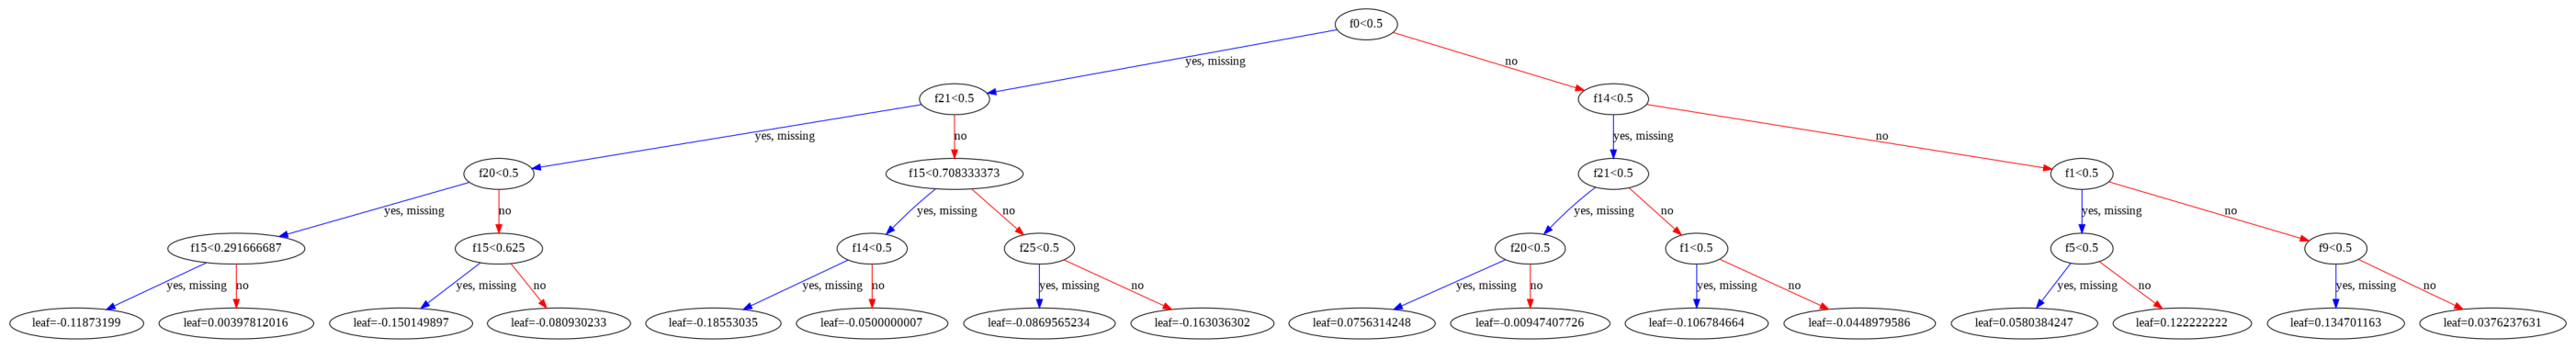

In [19]:
rcParams['figure.figsize'] = 50,20
plot_tree(model)
plt.show()

<div dir=rtl>
  <font color="yellow">
    در این قسمت recall و precision را چاپ میکنیم.
  </font>
</div>

In [20]:
def print_recall_precision(y_test, y_pred):
  precision, recall, _ = precision_recall_curve(y_test, y_pred)
  print(precision, recall)

print_recall_precision(y_test, y_pred)

[0.49636929 0.72281856 1.        ] [1.         0.79319844 0.        ]


# Set Hyperparameters

<div dir=rtl>
  <font color="yellow">
    در این قسمت به کمک GridSearchCV کار Parameter Tuning را انجام میدهیم. یعنی چهار پارامتر learning_rate, max_depth, n_estimators, colsample_bytree را با مقادیر مختلف تست میکنیم تا ببینیم به ازای کدوم عملکرد مدل بهتر است.
  </font>
</div>

In [21]:
def my_roc_auc_score(model, x, y):
  return roc_auc_score(y, model.predict_proba(x)[:, 1])

parameters = {'learning_rate': [0.02, 0.05, 0.1, 0.3],
              'max_depth': [2, 3, 4],
              'n_estimators': [100, 200, 300],
              'colsample_bytree': [0.8, 1]}

clf = GridSearchCV(model, parameters,
                   cv=3, 
                   scoring=my_roc_auc_score)
clf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(early_stopping_rounds=10,
                                     eval_metric='auc', max_depth=4,
                                     n_estimators=200, random_seed=123,
                                     random_state=123, subsample=0.5),
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.02, 0.05, 0.1, 0.3],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [100, 200, 300]},
             scoring=<function my_roc_auc_score at 0x7fa50ce0f7a0>)

<div dir=rtl>
  <font color="yellow">
    در این قسمت بهترین پارامتر هارا که از GridSearchCV بدست آورده ایم را چاپ میکنیم.
  </font>
</div>

In [22]:
best_parameters = clf.best_params_
best_score = clf.best_score_
print('best score:', best_score)
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

best score: 0.8174449324727447
colsample_bytree: 0.8
learning_rate: 0.05
max_depth: 4
n_estimators: 200


<div dir=rtl>
  <font color="yellow">
    در این قسمت دقت مدل را بر اساس بهترین پارامتر های بدست آمده بدست می آوریم که مشاهده میکنیم دقت آن نسبت به حالت قبل کمی افزایش یافته است.
  </font>
</div>

In [23]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7464635986420218

<div dir=rtl>
  <font color="yellow">
    در این قسمت نیز ماتریس درهم ریختگی را چاپ و آن را رسم میکنیم.
  </font>
</div>

[[7433 3248]
 [2129 8398]]


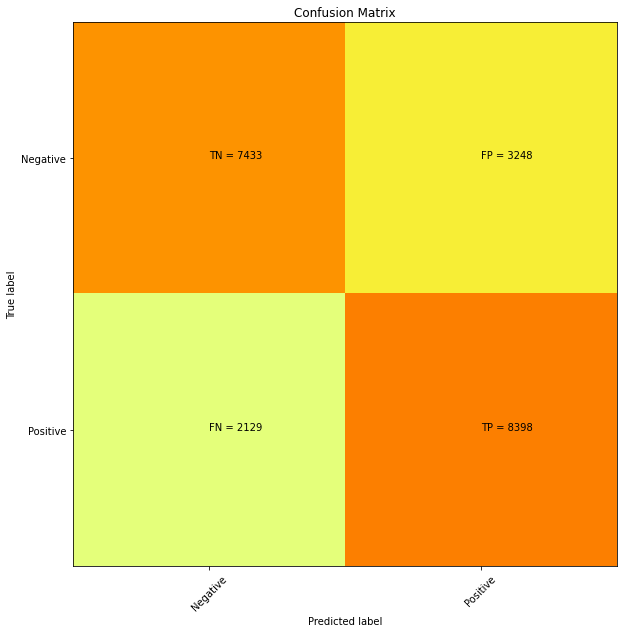

In [24]:
plot_confusion_matrix(y_test, y_pred)

<div dir=rtl>
  <font color="yellow">
    در این قسمت درخت تصمیم بدست آمده را چاپ میکنیم.
  </font>
</div>

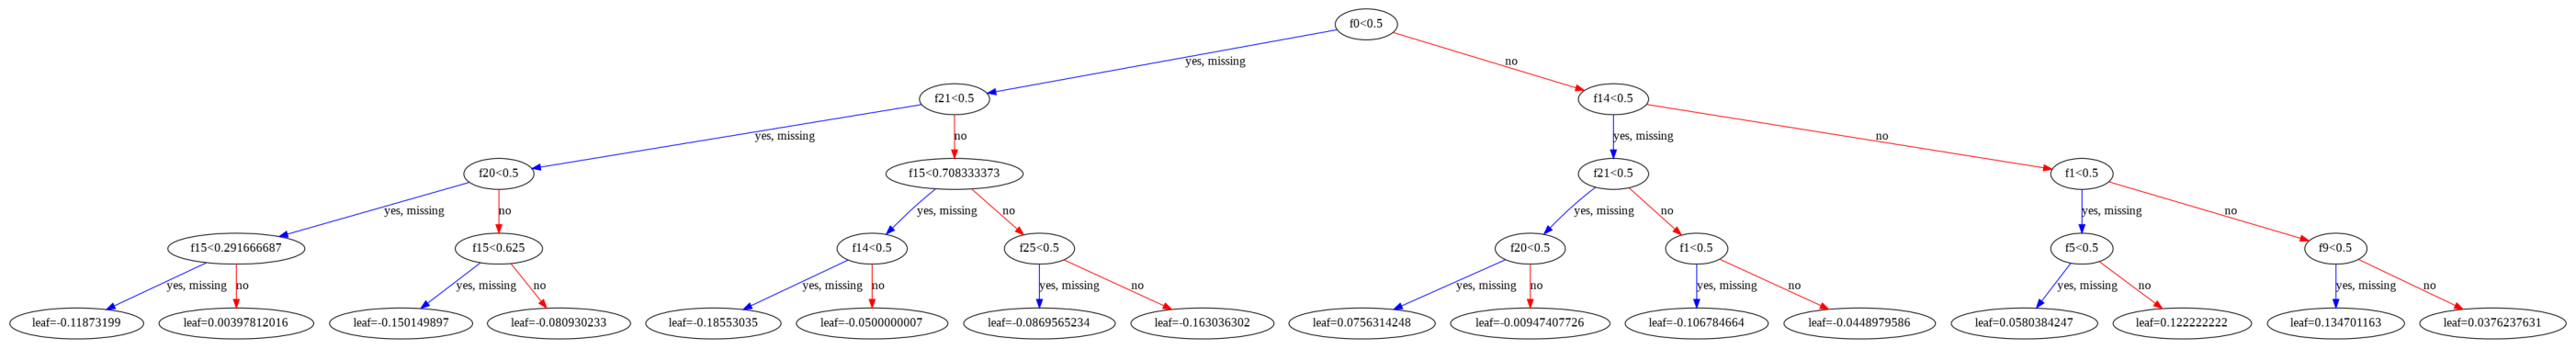

In [25]:
rcParams['figure.figsize'] = 50,20
plot_tree(model)
plt.show()

<div dir=rtl>
  <font color="yellow">
    در این قسمت recall و precision را چاپ میکنیم.
  </font>
</div>

In [26]:
print_recall_precision(y_test, y_pred)

[0.49636929 0.72110596 1.        ] [1.         0.79775815 0.        ]


# Plot Metric Changes

<div dir=rtl>
  <font color="yellow">
    در این قسمت نتایج بدست آمده از Parameter Tuning را چاپ میکنیم.
  </font>
</div>

In [27]:
clf.cv_results_

{'mean_fit_time': array([ 6.10543187,  6.54072618, 10.40146359,  4.50428279, 10.42788688,
        15.00214609,  6.53325923, 12.16931335, 17.23256493,  3.5642062 ,
         6.76341844,  9.75688195,  4.48218028, 10.14894342, 14.4548258 ,
         6.75377369, 11.44320099, 18.88907838,  3.31934516,  7.1946036 ,
        12.06807812,  4.45929869,  8.81118409, 13.36486983,  5.70592705,
        11.57264256, 17.14989026,  3.29925013,  6.50032663,  9.67085663,
         4.67276017,  9.03345998, 13.14862347,  5.72207991, 11.27198521,
        17.09480572,  3.8427159 ,  7.54277992, 11.15741277,  5.21592379,
        10.29707972, 15.62189102,  6.77137891, 13.35018055, 20.13372095,
         3.78389978,  7.48126268, 11.13555137,  5.2208306 , 10.24976786,
        15.57907041,  6.716959  , 13.26170071, 20.04331199,  3.77513329,
         7.42376018, 11.16591271,  5.21769563, 10.53051337, 15.38838466,
         6.73004619, 13.26750755, 20.01857678,  3.77900235,  7.45566058,
        11.13131897,  5.18309108, 

<div dir=rtl>
  <font color="yellow">
    در این قسمت ارتباط بین 
    max_depth
    و
    learning_rate
    را نمایش و رسم میکنیم.
  </font>
</div>

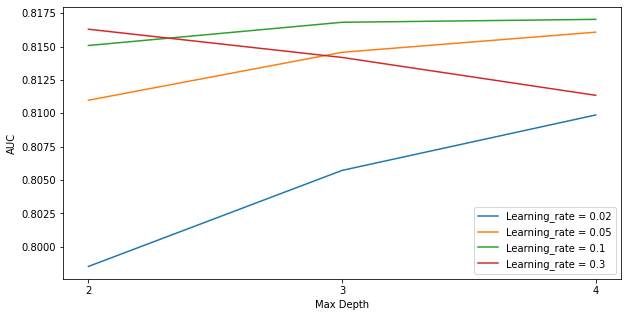

In [28]:
max_depth = [2, 3, 4]
score1 = []
score2 = []
score3 = []
score4 = []
for index, res in enumerate(clf.cv_results_['params']):
  if res['n_estimators'] == 100 and res['colsample_bytree'] == 0.8 and res['learning_rate'] == 0.02:
    score1.append(clf.cv_results_['mean_test_score'][index])
  if res['n_estimators'] == 100 and res['colsample_bytree'] == 0.8 and res['learning_rate'] == 0.05:
    score2.append(clf.cv_results_['mean_test_score'][index])
  if res['n_estimators'] == 100 and res['colsample_bytree'] == 0.8 and res['learning_rate'] == 0.1:
    score3.append(clf.cv_results_['mean_test_score'][index])
  if res['n_estimators'] == 100 and res['colsample_bytree'] == 0.8 and res['learning_rate'] == 0.3:
    score4.append(clf.cv_results_['mean_test_score'][index])

width1 = 10.
height1 = 5.
width_height_1 = (width1, height1)
plt.figure(figsize=width_height_1)
plt.plot(max_depth, score1)
plt.plot(max_depth, score2)
plt.plot(max_depth, score3)
plt.plot(max_depth, score4)
plt.legend(['Learning_rate = 0.02', 'Learning_rate = 0.05', 'Learning_rate = 0.1', 'Learning_rate = 0.3'])
plt.xlabel('Max Depth')
plt.ylabel('AUC')
plt.xticks(max_depth)
plt.show()

<div dir=rtl>
  <font color="yellow">
    در این قسمت ارتباط بین 
    max_depth
    و
    n_estimators
    را نمایش و رسم میکنیم.
  </font>
</div>

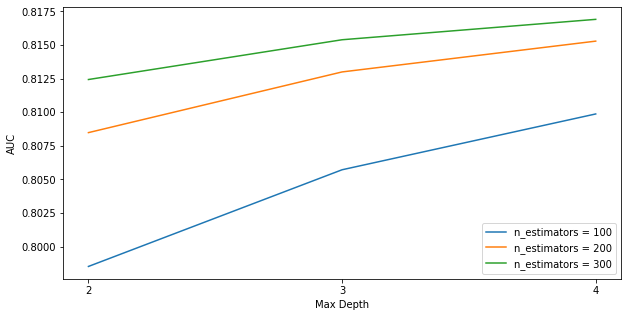

In [29]:
max_depth = [2, 3, 4]
score1 = []
score2 = []
score3 = []
for index, res in enumerate(clf.cv_results_['params']):
  if res['learning_rate'] == 0.02 and res['colsample_bytree'] == 0.8 and res['n_estimators'] == 100:
    score1.append(clf.cv_results_['mean_test_score'][index])
  if res['learning_rate'] == 0.02 and res['colsample_bytree'] == 0.8 and res['n_estimators'] == 200:
    score2.append(clf.cv_results_['mean_test_score'][index])
  if res['learning_rate'] == 0.02 and res['colsample_bytree'] == 0.8 and res['n_estimators'] == 300:
    score3.append(clf.cv_results_['mean_test_score'][index])

width1 = 10.
height1 = 5.
width_height_1 = (width1, height1)
plt.figure(figsize=width_height_1)
plt.plot(max_depth, score1)
plt.plot(max_depth, score2)
plt.plot(max_depth, score3)
plt.legend(['n_estimators = 100', 'n_estimators = 200', 'n_estimators = 300'])
plt.xlabel('Max Depth')
plt.ylabel('AUC')
plt.xticks(max_depth)
plt.show()

<div dir=rtl>
  <font color="yellow">
    در این قسمت ارتباط بین 
    max_depth
    و
    colsample_bytree
    را نمایش و رسم میکنیم.
  </font>
</div>

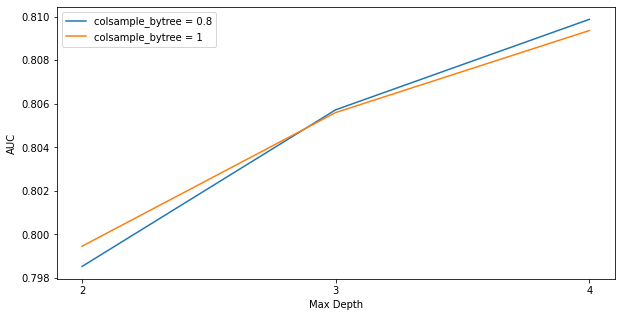

In [30]:
max_depth = [2, 3, 4]
score1 = []
score2 = []
for index, res in enumerate(clf.cv_results_['params']):
  if res['learning_rate'] == 0.02 and res['n_estimators'] == 100 and res['colsample_bytree'] == 0.8:
    score1.append(clf.cv_results_['mean_test_score'][index])
  if res['learning_rate'] == 0.02 and res['n_estimators'] == 100 and res['colsample_bytree'] == 1:
    score2.append(clf.cv_results_['mean_test_score'][index])

width1 = 10.
height1 = 5.
width_height_1 = (width1, height1)
plt.figure(figsize=width_height_1)
plt.plot(max_depth, score1)
plt.plot(max_depth, score2)
plt.legend(['colsample_bytree = 0.8', 'colsample_bytree = 1'])
plt.xlabel('Max Depth')
plt.ylabel('AUC')
plt.xticks(max_depth)
plt.show()

<div dir=rtl>
  <font color="yellow">
    در این قسمت ارتباط بین 
    learning_rate
    و
    n_estimators
    را نمایش و رسم میکنیم.
  </font>
</div>

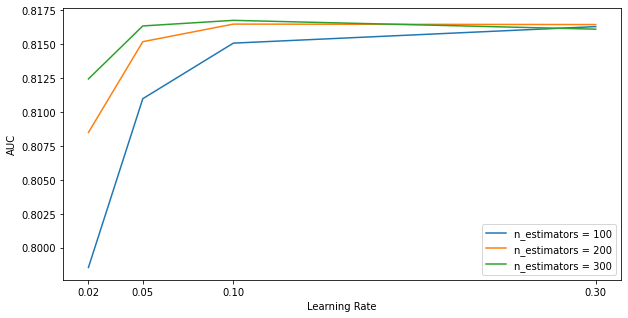

In [31]:
learning_rate = [0.02, 0.05, 0.1, 0.3]
score1 = []
score2 = []
score3 = []
for index, res in enumerate(clf.cv_results_['params']):
  if res['colsample_bytree'] == 0.8 and res['max_depth'] == 2 and res['n_estimators'] == 100:
    score1.append(clf.cv_results_['mean_test_score'][index])
  if res['colsample_bytree'] == 0.8 and res['max_depth'] == 2 and res['n_estimators'] == 200:
    score2.append(clf.cv_results_['mean_test_score'][index])
  if res['colsample_bytree'] == 0.8 and res['max_depth'] == 2 and res['n_estimators'] == 300:
    score3.append(clf.cv_results_['mean_test_score'][index])

width1 = 10.
height1 = 5.
width_height_1 = (width1, height1)
plt.figure(figsize=width_height_1)
plt.plot(learning_rate, score1)
plt.plot(learning_rate, score2)
plt.plot(learning_rate, score3)
plt.legend(['n_estimators = 100', 'n_estimators = 200', 'n_estimators = 300'])
plt.xlabel('Learning Rate')
plt.ylabel('AUC')
plt.xticks(learning_rate)
plt.show()

<div dir=rtl>
  <font color="yellow">
    در این قسمت ارتباط بین 
    learning_rate
    و
    colsample_bytree
    را نمایش و رسم میکنیم.
  </font>
</div>

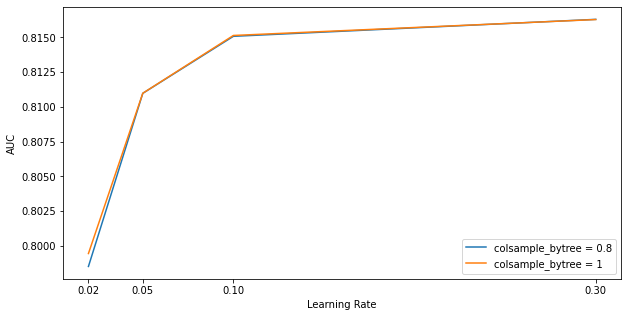

In [32]:
learning_rate = [0.02, 0.05, 0.1, 0.3]
score1 = []
score2 = []
score3 = []
for index, res in enumerate(clf.cv_results_['params']):
  if res['n_estimators'] == 100 and res['max_depth'] == 2 and res['colsample_bytree'] == 0.8:
    score1.append(clf.cv_results_['mean_test_score'][index])
  if res['n_estimators'] == 100 and res['max_depth'] == 2 and res['colsample_bytree'] == 1:
    score2.append(clf.cv_results_['mean_test_score'][index])

width1 = 10.
height1 = 5.
width_height_1 = (width1, height1)
plt.figure(figsize=width_height_1)
plt.plot(learning_rate, score1)
plt.plot(learning_rate, score2)
plt.legend(['colsample_bytree = 0.8', 'colsample_bytree = 1'])
plt.xlabel('Learning Rate')
plt.ylabel('AUC')
plt.xticks(learning_rate)
plt.show()

<div dir=rtl>
  <font color="yellow">
    در این قسمت ارتباط بین 
    n_estimators
    و
    colsample_bytree
    را نمایش و رسم میکنیم.
  </font>
</div>

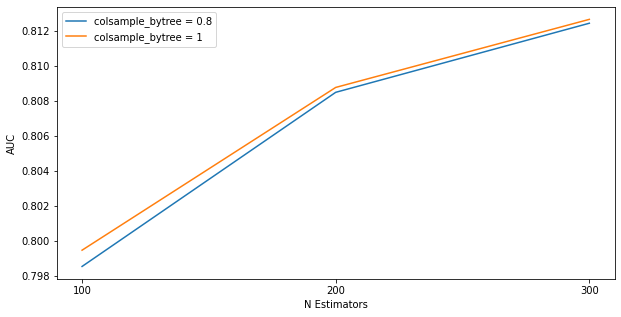

In [33]:
n_estimators = [100, 200, 300]
score1 = []
score2 = []
for index, res in enumerate(clf.cv_results_['params']):
  if res['learning_rate'] == 0.02 and res['max_depth'] == 2 and res['colsample_bytree'] == 0.8:
    score1.append(clf.cv_results_['mean_test_score'][index])
  if res['learning_rate'] == 0.02 and res['max_depth'] == 2 and res['colsample_bytree'] == 1:
    score2.append(clf.cv_results_['mean_test_score'][index])

width1 = 10.
height1 = 5.
width_height_1 = (width1, height1)
plt.figure(figsize=width_height_1)
plt.plot(n_estimators, score1)
plt.plot(n_estimators, score2)
plt.legend(['colsample_bytree = 0.8', 'colsample_bytree = 1'])
plt.xlabel('N Estimators')
plt.ylabel('AUC')
plt.xticks(n_estimators)
plt.show()